<a href="https://colab.research.google.com/github/erkoiv/IDS2021-ProjectC8-PetPopularity/blob/main/imageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batch_size = 64
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Yolov5/IDS2021-ProjectC8-PetPopularity/classifier/pet0-10/train",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6938 files belonging to 11 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Yolov5/IDS2021-ProjectC8-PetPopularity/classifier/pet0-10/val",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1983 files belonging to 11 classes.


In [ ]:
class_names = train_ds.class_names
num_classes=len(class_names)
print(class_names)

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']


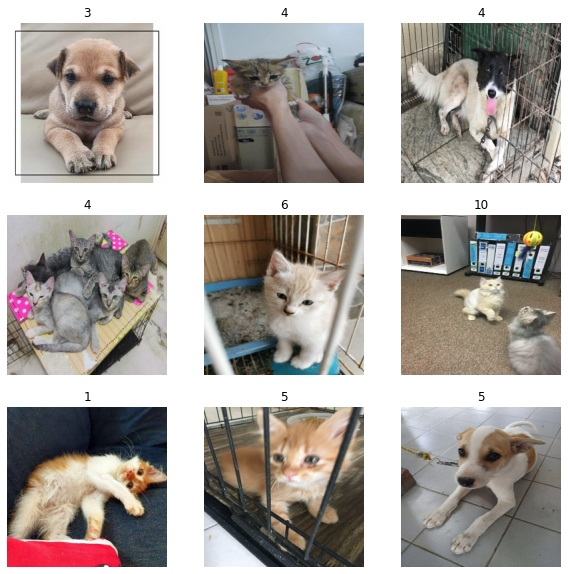

In [ ]:
import matplotlib.pyplot as plt
#for some reason this works after the second time it is run
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, activation='relu', padding='same'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, activation='relu', padding='same'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, activation='relu', padding='same'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.1),
  layers.BatchNormalization(),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_13 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_116 (Conv2D)         (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 128, 128, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_117 (Conv2D)         (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_111 (MaxPooli  (None, 64, 64, 32)       0         
 ng2D)                                               

In [ ]:
epochs = 1000
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/1000
109/109 [==============================] - 79s 223ms/step - loss: 2.6794 - accuracy: 0.1048 - val_loss: 2.1874 - val_accuracy: 0.2088
Epoch 2/1000
109/109 [==============================] - 23s 209ms/step - loss: 2.3418 - accuracy: 0.1764 - val_loss: 2.4605 - val_accuracy: 0.2088
Epoch 3/1000
109/109 [==============================] - 23s 209ms/step - loss: 2.2077 - accuracy: 0.2166 - val_loss: 2.1660 - val_accuracy: 0.2678
Epoch 4/1000
109/109 [==============================] - 23s 210ms/step - loss: 2.1392 - accuracy: 0.2319 - val_loss: 2.1515 - val_accuracy: 0.2678
Epoch 5/1000
109/109 [==============================] - 23s 210ms/step - loss: 2.0903 - accuracy: 0.2423 - val_loss: 2.0892 - val_accuracy: 0.2678
Epoch 6/1000
109/109 [==============================] - 23s 210ms/step - loss: 2.0773 - accuracy: 0.2486 - val_loss: 2.0930 - val_accuracy: 0.2678
Epoch 7/1000
109/109 [==============================] - 23s 209ms/step - loss: 2.0677 - accuracy: 0.2417 - val_loss: 2

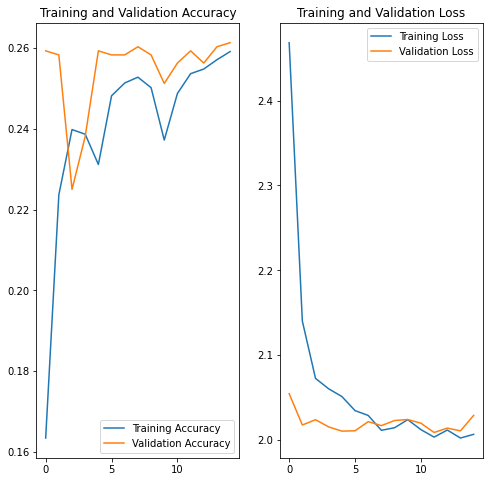

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

pet_path = "/content/drive/MyDrive/Yolov5/IDS2021-ProjectC8-PetPopularity/classifier/pet0-10/test/10/12b136b947a64c8b23e3929f70b41933.jpg"

img = tf.keras.utils.load_img(
    pet_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 3 with a 25.15 percent confidence.
